# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**


----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [ ]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [ ]:
from google.colab import files
melb_csv = files.upload()

Saving merged_sales_df.csv to merged_sales_df.csv


In [ ]:
melb_df = pandas.read_csv('merged_sales_df.csv')
melb_df

,Rooms,Price,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Suburb,zipcode,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2,1480000.0,1.0,1.0,202.0,NaN,NaN,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429
1,2,1035000.0,1.0,0.0,156.0,79.0,1900.0,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429
2,3,1465000.0,2.0,0.0,134.0,150.0,1900.0,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429
3,3,850000.0,2.0,1.0,94.0,NaN,NaN,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429
4,4,1600000.0,1.0,2.0,120.0,142.0,2014.0,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,3,1450000.0,1.0,1.0,312.0,NaN,NaN,Northern Metropolitan,Thornbury,3071.0,117.705882,693.823529,2578.588235
6379,3,1271000.0,1.0,2.0,470.0,151.0,1950.0,Northern Metropolitan,Thornbury,3071.0,117.705882,693.823529,2578.588235
6380,4,635000.0,2.0,1.0,662.0,172.0,1980.0,Western Metropolitan,Werribee,3030.0,78.933333,606.000000,2224.600000
6381,4,1245000.0,2.0,2.0,652.0,NaN,1981.0,South-Eastern Metropolitan,Wheelers Hill,3150.0,82.722222,522.055556,1901.611111


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [ ]:
# 1)
# Separamos el df original en 2, uno sin BuildingArea y YearBuilt, y otro que sólo contenga ambas.

melb_df_split = melb_df.drop(columns=['BuildingArea','YearBuilt'])
melb_df_remain = melb_df[['BuildingArea','YearBuilt']]


,Rooms,Price,Bathroom,Car,Landsize,Regionname,Suburb,zipcode,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean,BuildingArea,YearBuilt
0,2,1480000.0,1.0,1.0,202.0,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429,NaN,NaN
1,2,1035000.0,1.0,0.0,156.0,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429,79.0,1900.0
2,3,1465000.0,2.0,0.0,134.0,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429,150.0,1900.0
3,3,850000.0,2.0,1.0,94.0,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429,NaN,NaN
4,4,1600000.0,1.0,2.0,120.0,Northern Metropolitan,Abbotsford,3067.0,90.892857,597.821429,2214.071429,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,3,1450000.0,1.0,1.0,312.0,Northern Metropolitan,Thornbury,3071.0,117.705882,693.823529,2578.588235,NaN,NaN
6379,3,1271000.0,1.0,2.0,470.0,Northern Metropolitan,Thornbury,3071.0,117.705882,693.823529,2578.588235,151.0,1950.0
6380,4,635000.0,2.0,1.0,662.0,Western Metropolitan,Werribee,3030.0,78.933333,606.000000,2224.600000,172.0,1980.0
6381,4,1245000.0,2.0,2.0,652.0,South-Eastern Metropolitan,Wheelers Hill,3150.0,82.722222,522.055556,1901.611111,NaN,1981.0


Aplicamos una codificacion one hot a todas las columnas con valores categoricos, y guardamos el nuevo nombre de las columnas para poder componer nuevamente el resultado mas adelante.

In [ ]:
# 2)

from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Regionname', 'Suburb']
numerical_cols = ['Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'zipcode', 'airbnb_price_mean', 'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean' ]
new_categorical_cols = []

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_cols = encoder.fit_transform(melb_df_split[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_categorical_cols.append('{}={}'.format(col, col_value))

encoded_melb_columns = numpy.hstack([encoded_cols, melb_df_split[numerical_cols].values])

encoded_melb_df = pandas.DataFrame(encoded_melb_columns, columns=new_categorical_cols + numerical_cols)
encoded_melb_df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Regionname=Eastern Metropolitan,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Suburb=Abbotsford,Suburb=Albert Park,Suburb=Alphington,Suburb=Armadale,...,Suburb=Yarraville,Rooms,Price,Bathroom,Car,Landsize,zipcode,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,1480000.0,1.0,1.0,202.0,3067.0,90.892857,597.821429,2214.071429
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,1035000.0,1.0,0.0,156.0,3067.0,90.892857,597.821429,2214.071429
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,1465000.0,2.0,0.0,134.0,3067.0,90.892857,597.821429,2214.071429
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,3.0,850000.0,2.0,1.0,94.0,3067.0,90.892857,597.821429,2214.071429
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,4.0,1600000.0,1.0,2.0,120.0,3067.0,90.892857,597.821429,2214.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1450000.0,1.0,1.0,312.0,3071.0,117.705882,693.823529,2578.588235
6379,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,1271000.0,1.0,2.0,470.0,3071.0,117.705882,693.823529,2578.588235
6380,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,4.0,635000.0,2.0,1.0,662.0,3030.0,78.933333,606.000000,2224.600000
6381,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,1245000.0,2.0,2.0,652.0,3150.0,82.722222,522.055556,1901.611111


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
# 1) Agregamos las columnas YearBuilt y BuildingArea, que habíamos sacado previamente

encoded_melb_df_join = pandas.merge(encoded_melb_df,melb_df_remain,left_index=True,right_index=True)
encoded_melb_df_join

,Regionname=Eastern Metropolitan,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Suburb=Abbotsford,Suburb=Albert Park,Suburb=Alphington,Suburb=Armadale,...,Price,Bathroom,Car,Landsize,zipcode,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean,BuildingArea,YearBuilt
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1480000.0,1.0,1.0,202.0,3067.0,90.892857,597.821429,2214.071429,NaN,NaN
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1035000.0,1.0,0.0,156.0,3067.0,90.892857,597.821429,2214.071429,79.0,1900.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1465000.0,2.0,0.0,134.0,3067.0,90.892857,597.821429,2214.071429,150.0,1900.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,850000.0,2.0,1.0,94.0,3067.0,90.892857,597.821429,2214.071429,NaN,NaN
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1600000.0,1.0,2.0,120.0,3067.0,90.892857,597.821429,2214.071429,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1450000.0,1.0,1.0,312.0,3071.0,117.705882,693.823529,2578.588235,NaN,NaN
6379,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1271000.0,1.0,2.0,470.0,3071.0,117.705882,693.823529,2578.588235,151.0,1950.0
6380,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,635000.0,2.0,1.0,662.0,3030.0,78.933333,606.000000,2224.600000,172.0,1980.0
6381,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1245000.0,2.0,2.0,652.0,3150.0,82.722222,522.055556,1901.611111,NaN,1981.0


2) El caso base para comparar es la imputacion de las columnas YearBuilt y BuildingArea utilizando KNN y como base solo esas columnas

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = encoded_melb_df_join.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Otro de los casos comparados fue la imputacion de los datos usando KNN en YearBuilt y en BuildingArea previa normalizacion del DataFrame 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

normalized = encoded_melb_df_join.copy(deep=True)
melb_data_mice_normalized = scaler.fit_transform(normalized)
melb_data_mice_normalized = pandas.DataFrame(melb_data_mice_normalized, columns=normalized.columns)
melb_data_mice_normalized[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice_normalized[['YearBuilt', 'BuildingArea']])
melb_data_mice_normalized = scaler.inverse_transform(melb_data_mice_normalized)
melb_data_mice_normalized = pandas.DataFrame(melb_data_mice_normalized, columns=normalized.columns)
melb_data_mice_normalized

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Regionname=Eastern Metropolitan,Regionname=Northern Metropolitan,Regionname=Northern Victoria,Regionname=South-Eastern Metropolitan,Regionname=Southern Metropolitan,Regionname=Western Metropolitan,Suburb=Abbotsford,Suburb=Albert Park,Suburb=Alphington,Suburb=Armadale,...,Price,Bathroom,Car,Landsize,zipcode,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean,BuildingArea,YearBuilt
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1480000.0,1.0,1.0,202.0,3067.0,90.892857,597.821429,2214.071429,111.40000,1960.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1035000.0,1.0,0.0,156.0,3067.0,90.892857,597.821429,2214.071429,79.00000,1900.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1465000.0,2.0,0.0,134.0,3067.0,90.892857,597.821429,2214.071429,150.00000,1900.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,850000.0,2.0,1.0,94.0,3067.0,90.892857,597.821429,2214.071429,111.40000,1960.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1600000.0,1.0,2.0,120.0,3067.0,90.892857,597.821429,2214.071429,142.00000,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1450000.0,1.0,1.0,312.0,3071.0,117.705882,693.823529,2578.588235,111.40000,1960.0
6379,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1271000.0,1.0,2.0,470.0,3071.0,117.705882,693.823529,2578.588235,151.00000,1950.0
6380,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,635000.0,2.0,1.0,662.0,3030.0,78.933333,606.000000,2224.600000,172.00000,1980.0
6381,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1245000.0,2.0,2.0,652.0,3150.0,82.722222,522.055556,1901.611111,133.72244,1981.0


Y por ultimo la inputacion pero usando todas las columnas del DataFrame previa normalizacion de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

normalized = encoded_melb_df_join.copy(deep=True)
melb_data_mice_normalized_all_columns = scaler.fit_transform(normalized)
melb_data_mice_normalized_all_columns = pandas.DataFrame(melb_data_mice_normalized_all_columns, columns=normalized.columns)
melb_data_mice_normalized_all_columns[['YearBuilt','BuildingArea']] = pandas.DataFrame(mice_imputer.fit_transform(melb_data_mice_normalized_all_columns),columns=normalized.columns)[['YearBuilt','BuildingArea']]
melb_data_mice_normalized_all_columns = scaler.inverse_transform(melb_data_mice_normalized_all_columns)
melb_data_mice_normalized_all_columns = pandas.DataFrame(melb_data_mice_normalized_all_columns, columns=normalized.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Podemos notar que al utilizar todas las columnas para imputar los datos faltantes de YearBuilt, la distribucion de los valores imputados es mas parecido a la distribucion de los valores sin imputar removiendo NaN

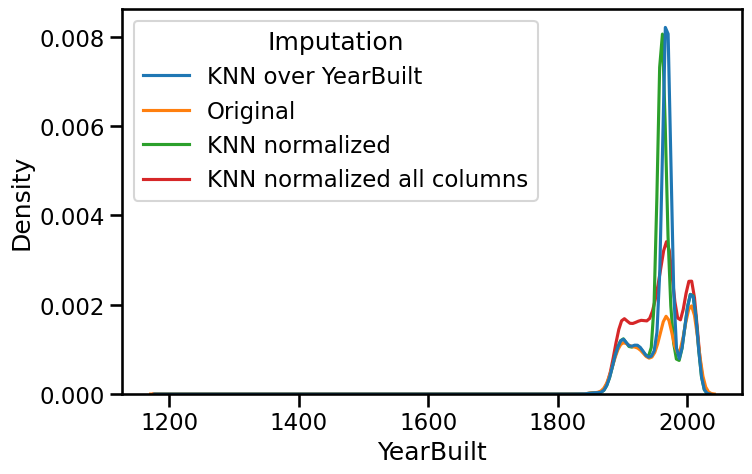

In [ ]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'

melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'

melb_data_mice_normalized_built = melb_data_mice_normalized.YearBuilt.to_frame()
melb_data_mice_normalized_built['Imputation'] = 'KNN normalized'

melb_data_mice_normalized_all_columns_built = melb_data_mice_normalized_all_columns.YearBuilt.to_frame()
melb_data_mice_normalized_all_columns_built['Imputation'] = 'KNN normalized all columns'

data = pandas.concat([mice_year_built, melb_year_build, melb_data_mice_normalized_built, melb_data_mice_normalized_all_columns_built])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

Podemos ver que lo mismo pasa para BuildingArea

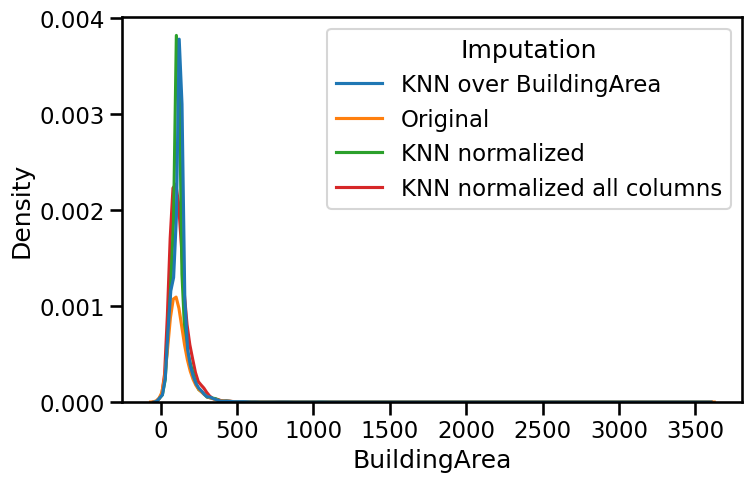

In [ ]:
mice_building_area = melb_data_mice.BuildingArea.to_frame()
mice_building_area['Imputation'] = 'KNN over BuildingArea'

melb_building_area = encoded_melb_df_join.BuildingArea.dropna().to_frame()
melb_building_area['Imputation'] = 'Original'

melb_data_mice_normalized_area = melb_data_mice_normalized.BuildingArea.to_frame()
melb_data_mice_normalized_area['Imputation'] = 'KNN normalized'

melb_data_mice_normalized_all_columns_area = melb_data_mice_normalized_all_columns.BuildingArea.to_frame()
melb_data_mice_normalized_all_columns_area['Imputation'] = 'KNN normalized all columns'

data = pandas.concat([mice_building_area, melb_building_area, melb_data_mice_normalized_area, melb_data_mice_normalized_all_columns_area])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='BuildingArea', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

Primero realizamos la imputacion de las columnas que tienen valores faltantes, debido a que el algoritmo de PCA no funciona si hay datos faltantes.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())

normalized = encoded_melb_df_join.copy(deep=True)
melb_data_mice_normalized_all_columns = scaler.fit_transform(normalized)
melb_data_mice_normalized_all_columns = pandas.DataFrame(melb_data_mice_normalized_all_columns, columns=normalized.columns)
melb_data_mice_normalized_all_columns[['YearBuilt','BuildingArea', 'Car']] = pandas.DataFrame(mice_imputer.fit_transform(melb_data_mice_normalized_all_columns),columns=normalized.columns)[['YearBuilt','BuildingArea', 'Car']]

melb_data_normalized = melb_data_mice_normalized_all_columns.copy(deep=True)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)

proyected_features = pca.fit_transform(melb_data_normalized)
pca.explained_variance_ratio_

array([0.26747721, 0.10109586, 0.05668014, 0.03014393, 0.02739593,
       0.02195722, 0.01973484, 0.01862315, 0.01689281, 0.01665918,
       0.01527673, 0.0143582 , 0.01395293, 0.01363851, 0.01330102,
       0.01236401, 0.01219542, 0.01212496, 0.0118272 , 0.01147743])

Basandonos en el grafico del ratio de varianza elegimos quedarnos con las primeras 5 columnas ya que representan casi un 50% de los datos.

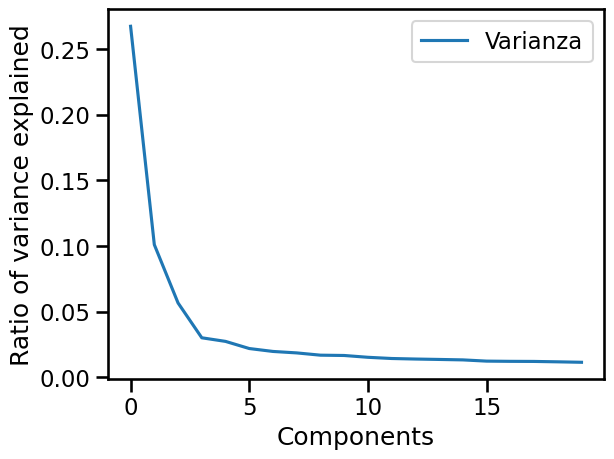

In [ ]:
seaborn.lineplot(x=range(pca.n_components),
                 y=pca.explained_variance_ratio_, label='Varianza')
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
plt.legend()

Antes de componer los datos, realizamos la denormalizacion de los datos.

In [ ]:
melb_data_mice_denormalized = scaler.inverse_transform(melb_data_normalized)
melb_data_mice_denormalized = pandas.DataFrame(melb_data_mice_denormalized, columns=melb_data_normalized.columns)


## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

Finalmente agregamos las columnas que obtuvimos como resultado del algoritmo de PCA

In [ ]:
melb_with_pca_df = numpy.hstack([melb_data_mice_denormalized.values, proyected_features[:,:5]])
pca_columns = ['pca1_standard', 'pca2_standard', 'pca3_standard', 'pca4_standard', 'pca5_standard']
numerical_cols = ['Rooms', 'Price', 'Bathroom', 'Car', 'Landsize', 'BuildingArea','YearBuilt','zipcode', 'airbnb_price_mean', 'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean' ]
new_columns = new_categorical_cols + numerical_cols + pca_columns

processed_melb_df = pandas.DataFrame(data=melb_with_pca_df, columns=new_columns)
processed_melb_df.to_csv('processed_melb_df.csv')
files.download('processed_melb_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan todas las columnas del dataset de airbnb que contengan algun dato faltante

  ## Características seleccionadas
  ### Características categóricas
  1. Suburb: suburbio. 87 valores únicos
  2. Regionname: nombre de la region. 6 valores únicos
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Price: Precio de compra
  3. Bathroom: Cantidad de baños
  4. Car: Cantidad de autos
  5. Landsize: Metros cuadrados del terreno
  6. BuildingArea: Superficie construida
  7. YearBuilt: Año de construcción
  8. zipcode: Codigo postal
  9. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot].
  10. airbnb_weekly_price: Se agrega el precio promedio semanal de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot].
  11. airbnb_monthly_price: Se agrega el precio promedio mensual de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot].

  ### Transformaciones:
  1. Todas las características numéricas fueron normalizadas.
  2. La columna `Suburb`, `YearBuilt` y `Car` fueron imputadas utilizando el método KNN usando todas las columnas del dataset como base.

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
